In [105]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

data = {'year': [2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017,
                 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016],
        'month': [12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
        'interest_rate': [2.75, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.25, 2.25, 2.25, 2, 2, 2,
                          1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75],
        'unemployment_rate': [5.3, 5.3, 5.3, 5.3, 5.4, 5.6, 5.5, 5.5, 5.5, 5.6, 5.7, 5.9, 6, 5.9,
                              5.8, 6.1, 6.2, 6.1, 6.1, 6.1, 5.9, 6.2, 6.2, 6.1],
        'index_price': [1464, 1394, 1357, 1293, 1256, 1254, 1234, 1195, 1159, 1167, 1130, 1075,
                        1047, 965, 943, 958, 971, 949, 884, 866, 876, 822, 704, 719]}
df = pd.DataFrame(data)
print(df)

    year  month  interest_rate  unemployment_rate  index_price
0   2017     12           2.75                5.3         1464
1   2017     11           2.50                5.3         1394
2   2017     10           2.50                5.3         1357
3   2017      9           2.50                5.3         1293
4   2017      8           2.50                5.4         1256
5   2017      7           2.50                5.6         1254
6   2017      6           2.50                5.5         1234
7   2017      5           2.25                5.5         1195
8   2017      4           2.25                5.5         1159
9   2017      3           2.25                5.6         1167
10  2017      2           2.00                5.7         1130
11  2017      1           2.00                5.9         1075
12  2016     12           2.00                6.0         1047
13  2016     11           1.75                5.9          965
14  2016     10           1.75                5.8      

# 선형 회귀: 이자율과 물가지수 상관 관계 분석

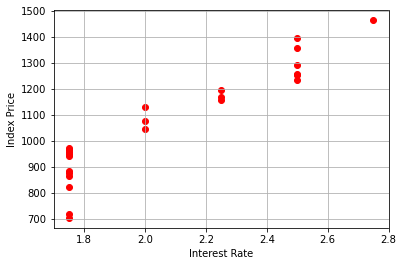

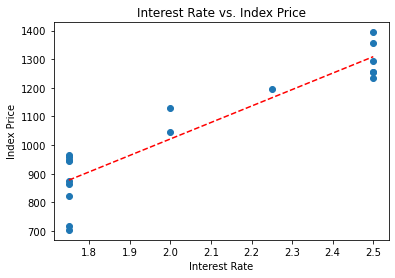

Interest Rate vs. Index Price
coef_: [[574.45637584]], intercept_:-127.38255033557084
train data score:  0.8541859618501457
test data score:  0.941892392945057


In [106]:
lr = LinearRegression()
# 선형 회귀 모델 훈련

interest_rate = np.array(df['interest_rate'].tolist())
index_price = np.array(df['index_price'].tolist())

train_input, test_input, train_target, test_target = train_test_split(
interest_rate, index_price, random_state=42)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

lr.fit(train_input, train_target)

plt.scatter(df['interest_rate'].tolist(), df['index_price'].tolist(), color = 'red')
plt.xlabel('Interest Rate')
plt.ylabel('Index Price')
plt.grid()
plt.show()


plt.scatter(train_input, train_target)
plt.plot([1.75, 2.5], [1.75 * lr.coef_ + lr.intercept_, 2.5 * lr.coef_ + lr.intercept_],
         color='red', linestyle='--')
plt.xlabel('Interest Rate')
plt.ylabel('Index Price')
plt.title('Interest Rate vs. Index Price')
plt.show()

print('Interest Rate vs. Index Price')
print(f'coef_: [{lr.coef_}], intercept_:{lr.intercept_}')
print('train data score: ', lr.score(train_input, train_target))
print('test data score: ', lr.score(test_input, test_target))

# 다항 회귀: 이자율과 물가지수 상관 관계 분석

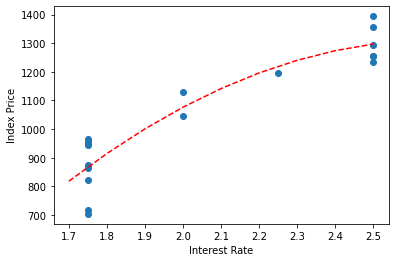

이자율과 물가지수 다항 회귀
다항 회귀 coef_:[[-524.84946237 2802.42473118]], intercept_:-2429.102822580652
다항 회귀 train data score:  0.8676269364555872
다항 회귀 test data score:  0.794526521436733


In [107]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

lr = LinearRegression()
lr.fit(train_poly, train_target)

point= np.arange(1.7, 2.6, 0.1)
plt.scatter(train_input, train_target)
plt.plot(point, -524.8*point**2 + 2802.42*point - 2429.1, color='red', linestyle='--')
plt.xlabel('Interest Rate')
plt.ylabel('Index Price')
plt.show()

print('이자율과 물가지수 다항 회귀')
print(f'다항 회귀 coef_:[{lr.coef_}], intercept_:{lr.intercept_}')
print('다항 회귀 train data score: ', lr.score(train_poly, train_target))
print('다항 회귀 test data score: ', lr.score(test_poly, test_target))

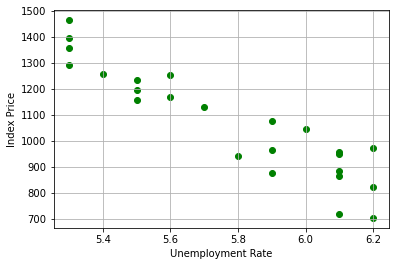

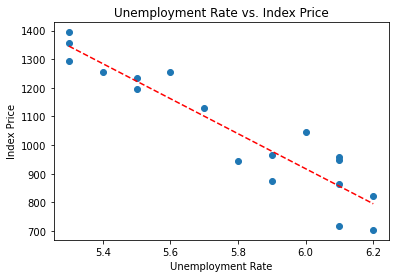

Unemployment Rate vs. Index Price
coef_: [[-611.41330166]], intercept_:4586.05463182898
train data score:  0.8748908875163574
test data score:  0.707475113377226


In [108]:
lr = LinearRegression()
# 선형 회귀 모델 훈련

unemployment_rate = np.array(df['unemployment_rate'].tolist())
index_price = np.array(df['index_price'].tolist())

train_input, test_input, train_target, test_target = train_test_split(
unemployment_rate, index_price, random_state=42)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

lr.fit(train_input, train_target)

plt.scatter(df['unemployment_rate'].tolist(), df['index_price'].tolist(), color = 'green')
plt.xlabel('Unemployment Rate')
plt.ylabel('Index Price')
plt.grid()
plt.show()


plt.scatter(train_input, train_target)
plt.plot([5.3, 6.2], [5.3 * lr.coef_ + lr.intercept_, 6.2 * lr.coef_ + lr.intercept_],
         color='red', linestyle='--')
plt.xlabel('Unemployment Rate')
plt.ylabel('Index Price')
plt.title('Unemployment Rate vs. Index Price')
plt.show()

print('Unemployment Rate vs. Index Price')
print(f'coef_: [{lr.coef_}], intercept_:{lr.intercept_}')
print('train data score: ', lr.score(train_input, train_target))
print('test data score: ', lr.score(test_input, test_target))

# 다항 회귀: 실업률과 물가지수 상관 관계 분석

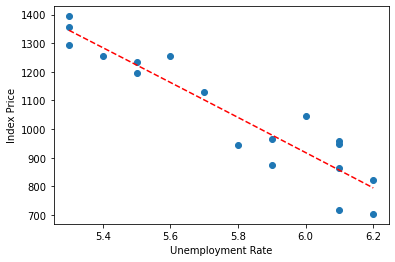

실업률과 물가지수 다항 회귀
다항 회귀 coef_:[[  -7.26428138 -527.97932022]], intercept_:4347.248197109279
다항 회귀 train data score:  0.8748971920999006
다항 회귀 test data score:  0.7057073065929054


In [109]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

lr = LinearRegression()
lr.fit(train_poly, train_target)

point= np.arange(5.3, 6.3, 0.1)
plt.scatter(train_input, train_target)
plt.plot(point, -7.26*point**2 -527.97*point + 4347.24, color='red', linestyle='--')
plt.xlabel('Unemployment Rate')
plt.ylabel('Index Price')
plt.show()

print('실업률과 물가지수 다항 회귀')
print(f'다항 회귀 coef_:[{lr.coef_}], intercept_:{lr.intercept_}')
print('다항 회귀 train data score: ', lr.score(train_poly, train_target))
print('다항 회귀 test data score: ', lr.score(test_poly, test_target))